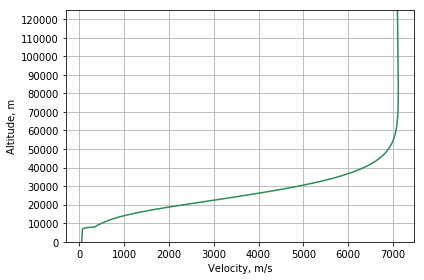

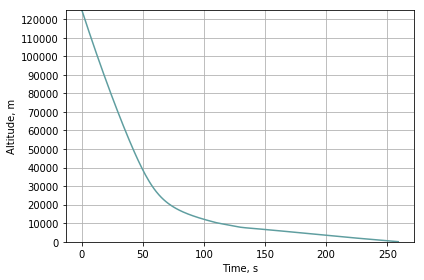

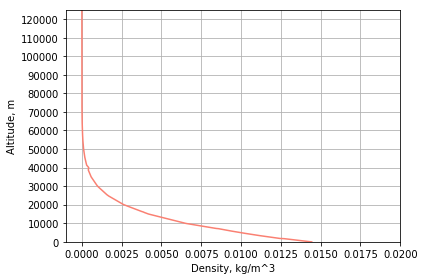

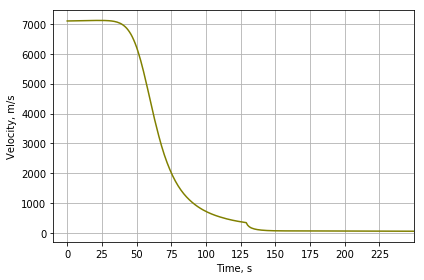

In [411]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 17 12:21:23 2020

@author: Mikhail LaMay
@position: Aerospace Engineering Student, Class of 2021
@Assignment: Senior Design Project: Spacecraft Reentry Parachute Trajectory

"""

#=============================================================================
# Imported Modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

#=============================================================================
# Open Initial Trajectory Data and Import into This Script

# Open's MARS_ATM_P_ENT_TRAJ_v2.txt & RR Variables
#with open('MARS_ATM_P_ENT_TRAJ.txt', 'r') as reader:
    # Read & print the entire file
    #print(reader.read())
df = pd.read_csv('MARS_ATM_P_ENT_TRAJ_v2.txt', sep='\t', lineterminator='\n')

# Repare Print Issues:
pd.options.display.max_rows = 4000

#=============================================================================
# Define Initial Variables

time = df['t(s)']                                   # sec
alt = df['Alt(m)']                                  # m
vel = df['Vel(m/s)']                                # m/s
gamma = df['Gamma']                                 # degree    
den = df['Den(kg/m^3)\r']                           # kg/m^3

G = 3.711                                           # m/s^2
R_Mars = 3389.5e3                                   # m
Mass_Pr = 300                                       # kg
Mass_Chute = 0 #Changing Gives Errors               # kg
Area_Pr = 3.14                                      # m^2
Diameter_Chute = 7.5                                # m
Area_Chute = 30                                     # m^2

#=============================================================================
# Problem #1: Calulcate Drag Coefficient & Drag Force

# Acceleration
x = df['t(s)']                                      # s
y = df['Vel(m/s)']                                  # m/s
accel = -1*(y.diff())                               # m/s^2

# Force of Gravity
F = (Mass_Pr * accel)                               # N @ alt

# Gravity & Weight
G_alt = G * (R_Mars**2)/((R_Mars + alt)**2)         # m/s^2 @ alt
W_alt = G_alt * Mass_Pr                             # N @ alt

# Drag Coefficient Based Off Reentry Conditions
gamma_rad = np.deg2rad(gamma)
C_1 = np.sin(gamma_rad)
C_2 = np.cos(2*gamma_rad)
C_3 = 2*W_alt*C_1
C_4 = np.sqrt(2)
C_5 = np.sqrt(np.absolute((2*(F**2) - (W_alt**2)*(C_2) - (W_alt**2))))
C_6 = den * vel**2 * Area_Pr
#C_D = (-1* ((C_3 - (C_4 * C_5)) / C_6)) #C_D @ Alt

C_D = 1.63117 #Drag Coefficient Found
#C_D = 1.64 #Drag Coefficeint Provided By Dr. Lyne
#C_D = 3 #Drag Coefficient For Parachute to Function Properly

# Drag Force
Drag = (.5)*(den)*(vel**2)*(Area_Pr)*C_D           # N

# Calculating Initial Velocity Trajectory Components
vel_x_original = y * np.cos(np.deg2rad(gamma))
vel_y_original = y * np.sin(np.deg2rad(gamma))

# Plotting Initial Velocity Trajectory Components (Debugging)
plot_xy_velocity_orig = False

if plot_xy_velocity_orig == True:
    plt.figure()
    plt.plot(time,vel_x_original, 'r')
    plt.show()

    plt.figure()
    plt.plot(time,vel_y_original, 'g')
    plt.show()

#=============================================================================
# Plot Initial Reentry Trajectory Data w/out Parachute

plot_orig_graphs = False

if plot_orig_graphs == True:
    # Time vs Altitude
    df.plot(kind='scatter', x='t(s)', y='Alt(m)', color = 'blue')
    axes = plt.gca()
    plt.xlabel('Time, s', fontsize=10)
    axes.set_ylim([0,125000])
    y_ticks = np.arange(0,125000,10000)
    plt.yticks(y_ticks)
    plt.ylabel('Altitude, m', fontsize=10)
    plt.grid()
    plt.tight_layout()
    plt.savefig('Time vs Altitude_Orig.png')
    plt.show()
    
    # Velocity vs Altitude
    df.plot(kind='scatter', x= 'Vel(m/s)', y='Alt(m)', color = 'purple')
    axes = plt.gca()
    plt.xlabel('Velocity, m/s', fontsize=10)
    x_ticks = np.arange(0,8000,1000)
    plt.xticks(x_ticks)
    plt.ylabel('Altitude, m', fontsize=10)
    axes.set_ylim([0,125000])
    y_ticks = np.arange(0,125000,10000)
    plt.yticks(y_ticks)
    plt.grid()
    plt.tight_layout()
    plt.savefig('Velocity vs Altitude_Orig.png')
    plt.show()
    
    # Acceleration Plot (Velocity v. Time)
    df.plot(kind='scatter', x='t(s)', y='Vel(m/s)', color = 'green')
    plt.xlabel('Time, s', fontsize=10)
    plt.ylabel('Velocity, m/s', fontsize=10)
    y_ticks = np.arange(0,8000,500)
    plt.yticks(y_ticks)
    plt.grid()
    plt.tight_layout()
    plt.savefig('Velocity vs Time_Orig.png')
    plt.show()
    
    # Density vs Altitude
    df.plot(kind='scatter', x='Den(kg/m^3)\r', y='Alt(m)', color = 'orange')
    axes = plt.gca()
    plt.xlabel('Density, kg/m^3', fontsize=10)
    axes.set_xlim([-0.001,0.02])
    plt.ylabel('Altitude, m', fontsize=10)
    axes.set_ylim([0,125000])
    y_ticks = np.arange(0,125000,10000)
    plt.yticks(y_ticks)
    plt.grid()
    plt.tight_layout()
    plt.savefig('Density vs Altitude_Orig.png')
    plt.show()

    # Time vs Acceleration
    plt.plot(x,-accel, 'goldenrod')
    axes = plt.gca()
    plt.xlabel('Time, s', fontsize=10)
    plt.ylabel('Acceleration, m/s^2', fontsize=10)
    plt.grid()
    plt.tight_layout()
    plt.savefig('Time vs Acceleration_Orig.png')
    plt.show()
    
#=============================================================================
# Probelem 2: CurveFit Density Respect to Altitude

# 6-Order Polynomial to CurveFit Density
#poly = np.polyfit(alt,den,6)
poly = np.polynomial.polynomial.Polynomial.fit(alt,den,6)

# Debugging Script - Required to Function Properly
reversed_altitude = df['Alt(m)'].iloc[::-1]
reversed_density = df['Den(kg/m^3)\r'].iloc[::-1]
 
def new_density(alt):
    if alt >= 1806.2:
        return np.interp(alt, reversed_altitude, reversed_density)
    elif alt < 1806.2:
        return poly(alt)

def new_gravity(alt):
    return G * (R_Mars**2)/((R_Mars + alt)**2)

def new_weight(grav,mass):
    return grav*mass

#=============================================================================
# Problem 3: Predict Trajectory Curve w/ Parachute

x_vel = vel * np.cos(np.deg2rad(gamma))
y_vel = vel * np.sin(np.deg2rad(gamma))
#print(np.rad2deg(np.arctan(y_vel/x_vel)))

# Define Alt & Velocity
def trajectory(alt, vel_mag, Area, gamma_alt, C_D_2, W_alt_2,i):
    
    rho = np.absolute(new_density(alt))

    force_drag = (1/2) * (rho) * (vel_mag**2) * Area * C_D_2
    force_x = -(force_drag * np.cos(np.deg2rad(gamma_alt)))
    force_y = -W_alt_2 + -(force_drag * np.sin(np.deg2rad(gamma_alt)))
    
    accel_x_new = force_x/Mass_Pr
    accel_y_new = force_y/Mass_Pr
    
    time = 1 # Seconds
    vel_x = (np.cos(np.deg2rad(gamma_alt)) * vel_mag) + accel_x_new * time
    vel_y = (np.sin(np.deg2rad(gamma_alt)) * vel_mag) + accel_y_new * time
    
    new_alt = alt + vel_y*time
    mag_vel = (vel_x**2 + vel_y**2)**(1/2)
    #define gamma
    new_gamma = np.rad2deg(np.arctan(vel_y/vel_x))
    new_rho = np.absolute(new_density(new_alt))
    
    return [new_rho, force_drag, force_x, force_y, accel_x_new, accel_y_new, vel_x, vel_y, new_alt, mag_vel, new_gamma,(i+(copy_pasta+1))]

#=============================================================================
# Parachute Deployment Algorithm

i = 0
data = []
termination_alt = 125000
deploy_chute = False
deploy_threshold = 8000

copy_pasta = 110
data_to_copy = df[:(copy_pasta +1)]
C_D = 1.63117
while termination_alt >= 0:
            
    if i == 0:
        #store initial conditions
        data.append([6.31E-9,0,0,0,0,0,0,0,125000,0,i])
        
    elif i == 1:
        alt_term = df['Alt(m)'][(copy_pasta+1)]
        first_grav = new_gravity(alt_term)
        weight_term = new_weight(first_grav,(Mass_Pr + Mass_Chute))
        data.append(trajectory(alt_term, vel[(copy_pasta+1)], Area_Pr, gamma[(copy_pasta+1)], C_D, weight_term,i))
        
    elif i > 0:
        alt_term = data[i-1][8]
        if alt_term < deploy_threshold:
            deploy_chute = True
            
        if deploy_chute == True:
            Area_Pr = 3.14 + Area_Chute
        
        vel_term = data[i-1][9]
        gamma_term = data[i-1][10]
        
        weight_term = new_weight(new_gravity(alt_term),(Mass_Pr + Mass_Chute))
        
        data.append(trajectory(alt_term, vel_term, Area_Pr, gamma_term, C_D, weight_term,i))
    termination_alt = data[i][8]
    i += 1
    
new_df = pd.DataFrame(data)
new_df.columns =['Den(kg/m^3)','Force Drag','Force X','Force Y','New X Accel','New Y Accel','Velocity in X','Velocity in Y','Alt(m)','Vel(m/s)', 'Gamma','t(s)']
#print(new_df)

# Plotting Final Velocity Trajectory Components (Debugging)
#new_df.plot('t(s)','Velocity in X')
#plt.show()
#new_df.plot('t(s)','Velocity in Y')
#plt.show()

# Decreasing Sample Size and Correcting Errors
new_df_clip  = new_df.iloc[1:]
new_df_clip2  = new_df_clip.iloc[:-2]

new_time_data = data_to_copy['t(s)'].append(new_df_clip2['t(s)'],ignore_index=True)
new_time_data_2 = data_to_copy['t(s)'].append(new_df_clip2['t(s)'],ignore_index=True)
new_alt_data = data_to_copy['Alt(m)'].append(new_df_clip['Alt(m)'],ignore_index=True)

new_alt_data_2 = data_to_copy['Alt(m)'].append(new_df_clip2['Alt(m)'],ignore_index=True)

new_vel_data = data_to_copy['Vel(m/s)'].append(new_df_clip['Vel(m/s)'],ignore_index=True)
new_vel_data_2 = data_to_copy['Vel(m/s)'].append(new_df_clip2['Vel(m/s)'],ignore_index=True)
# new_vel_data = test_vel_data.drop(test_vel_data.tail(0).index,inplace=True)
# new_vel_data = test_vel_data.iloc[:-2]
new_den_data = data_to_copy['Den(kg/m^3)\r'].append(new_df_clip['Den(kg/m^3)'],ignore_index=True)

#=============================================================================
# Plot Initial Reentry Trajectory Data w/ Parachute
plot_new_graphs = True

if plot_new_graphs == True:

    # Velocity vs Altitude w/ Parachute
    plt.figure()
    plt.plot(new_vel_data_2, new_alt_data_2, 'seagreen')
    axes = plt.gca()
    plt.xlabel('Velocity, m/s', fontsize=10)
    x_ticks = np.arange(0,8000,1000)
    plt.xticks(x_ticks)
    plt.ylabel('Altitude, m', fontsize=10)
    axes.set_ylim([0,125000])
    y_ticks = np.arange(0,125000,10000)
    plt.yticks(y_ticks)
    plt.grid()
    plt.tight_layout()
    plt.savefig('Velocity_v_Altitude_After_Parachute.png')
    plt.show()

    # Time vs Altitude w/ Parachute
    plt.figure()
    plt.plot(new_time_data_2, new_alt_data_2, 'cadetblue')
    axes = plt.gca()
    plt.xlabel('Time, s', fontsize=10)
    # x_ticks = np.arange(0,8000,1000)
    # plt.xticks(x_ticks)
    plt.ylabel('Altitude, m', fontsize=10)
    axes.set_ylim([0,125000])
    y_ticks = np.arange(0,125000,10000)
    plt.yticks(y_ticks)
    plt.grid()
    plt.tight_layout()
    plt.savefig('Time_v_Altitude_After_Parachute.png')
    plt.show()

    # Altitude vs Density w/ Parachute
    plt.figure()
    plt.plot(new_den_data,new_alt_data, 'salmon')
    axes = plt.gca()
    plt.xlabel('Density, kg/m^3', fontsize=10)
    axes.set_xlim([-0.001,0.02])
    plt.ylabel('Altitude, m', fontsize=10)
    axes.set_ylim([0,125000])
    y_ticks = np.arange(0,125000,10000)
    plt.yticks(y_ticks)
    plt.grid()
    plt.tight_layout()
    plt.savefig('Altitude_v_Density_After_CurveFit.png')
    plt.show()

    # Acceleration Plot (Velocity v. Time)
    plt.plot(new_time_data_2, new_vel_data_2, 'olive')
    plt.xlabel('Time, s', fontsize=10)
    axes = plt.gca()
    axes.set_xlim([-10,250])
    x_ticks = np.arange(0,250,25)
    plt.xticks(x_ticks)
    plt.ylabel('Velocity, m/s', fontsize=10)
    plt.grid()
    plt.tight_layout()
    plt.savefig('Velocity_v_Time_After_Parachute.png')
    plt.show()

#=============================================================================

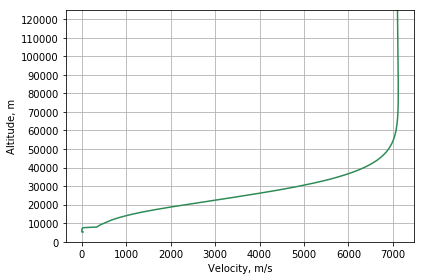

In [403]:
# Velocity vs Altitude w/ Parachute
plt.figure()
plt.plot(new_vel_data_2, new_alt_data_2, 'seagreen')
axes = plt.gca()
plt.xlabel('Velocity, m/s', fontsize=10)
x_ticks = np.arange(0,8000,1000)
plt.xticks(x_ticks)
plt.ylabel('Altitude, m', fontsize=10)
axes.set_ylim([0,125000])
y_ticks = np.arange(0,125000,10000)
plt.yticks(y_ticks)
plt.grid()
plt.tight_layout()
plt.savefig('Velocity_v_Altitude_After_Parachute.png')
plt.show()

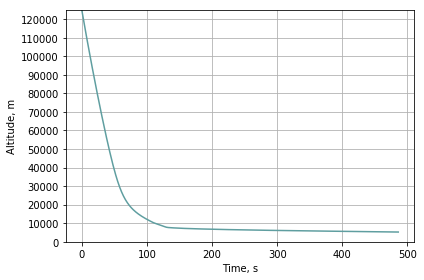

In [404]:
# Time vs Altitude w/ Parachute
plt.figure()
plt.plot(new_time_data_2, new_alt_data_2, 'cadetblue')
axes = plt.gca()
plt.xlabel('Time, s', fontsize=10)
# x_ticks = np.arange(0,8000,1000)
# plt.xticks(x_ticks)
plt.ylabel('Altitude, m', fontsize=10)
axes.set_ylim([0,125000])
y_ticks = np.arange(0,125000,10000)
plt.yticks(y_ticks)
plt.grid()
plt.tight_layout()
plt.savefig('Time_v_Altitude_After_Parachute.png')
plt.show()

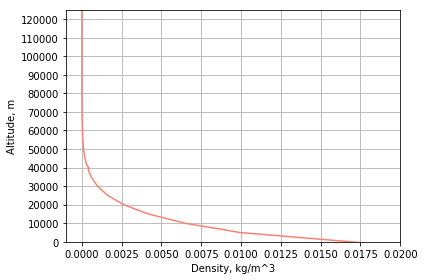

In [405]:
# Altitude vs Density w/ Parachute
plt.figure()
plt.plot(new_den_data,new_alt_data, 'salmon')
axes = plt.gca()
plt.xlabel('Density, kg/m^3', fontsize=10)
axes.set_xlim([-0.001,0.02])
plt.ylabel('Altitude, m', fontsize=10)
axes.set_ylim([0,125000])
y_ticks = np.arange(0,125000,10000)
plt.yticks(y_ticks)
plt.grid()
plt.tight_layout()
plt.savefig('Altitude_v_Density_After_CurveFit.png')
plt.show()

In [406]:
print(poly)

poly([ 5.61998998e-05 -2.27756452e-04 -7.51106202e-05 -6.98105429e-04
  4.52353017e-03 -5.38875253e-03  1.77798255e-03])


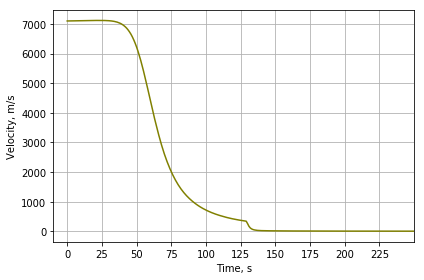

In [407]:
# Acceleration Plot (Velocity v. Time)
plt.plot(new_time_data_2, new_vel_data_2, 'olive')
plt.xlabel('Time, s', fontsize=10)
axes = plt.gca()
axes.set_xlim([-10,250])
x_ticks = np.arange(0,250,25)
plt.xticks(x_ticks)
plt.ylabel('Velocity, m/s', fontsize=10)
plt.grid()
plt.tight_layout()
plt.savefig('Velocity_v_Time_After_Parachute.png')
plt.show()

In [412]:
print(new_df)

      Den(kg/m^3)    Force Drag       Force X      Force Y  New X Accel  \
0    6.310000e-09      0.000000      0.000000     0.000000     0.000000   
1    6.462491e-03   4455.115987  -4341.281216  -105.998943   -14.470937   
2    6.533749e-03   4257.373556  -4141.709918  -121.112060   -13.805700   
3    6.614946e-03   4081.135221  -3963.288710  -133.163158   -13.210962   
4    6.696317e-03   3921.913248  -3801.591486  -142.891808   -12.671972   
5    6.778419e-03   3772.142375  -3649.238738  -151.927199   -12.164129   
6    6.860928e-03   3631.437660  -3505.835659  -160.238346   -11.686119   
7    6.943662e-03   3498.953044  -3370.542779  -167.920758   -11.235143   
8    7.026511e-03   3374.015060  -3242.690265  -175.040127   -10.808968   
9    7.110048e-03   3256.056738  -3121.713199  -181.645578   -10.405711   
10   7.194289e-03   3144.868615  -3007.390840  -187.692993   -10.024636   
11   7.279248e-03   3039.985994  -2899.258051  -193.215280    -9.664194   
12   7.364277e-03   2940.

In [409]:
print(new_df)

      Den(kg/m^3)    Force Drag       Force X       Force Y   New X Accel  \
0    6.310000e-09  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1    6.462491e-03  4.455116e+03 -4.341281e+03 -1.059989e+02 -1.447094e+01   
2    6.533749e-03  4.257374e+03 -4.141710e+03 -1.211121e+02 -1.380570e+01   
3    6.614946e-03  4.081135e+03 -3.963289e+03 -1.331632e+02 -1.321096e+01   
4    6.696317e-03  3.921913e+03 -3.801591e+03 -1.428918e+02 -1.267197e+01   
5    6.778419e-03  3.772142e+03 -3.649239e+03 -1.519272e+02 -1.216413e+01   
6    6.860928e-03  3.631438e+03 -3.505836e+03 -1.602383e+02 -1.168612e+01   
7    6.943662e-03  3.498953e+03 -3.370543e+03 -1.679208e+02 -1.123514e+01   
8    7.026511e-03  3.374015e+03 -3.242690e+03 -1.750401e+02 -1.080897e+01   
9    7.110048e-03  3.256057e+03 -3.121713e+03 -1.816456e+02 -1.040571e+01   
10   7.194289e-03  3.144869e+03 -3.007391e+03 -1.876930e+02 -1.002464e+01   
11   7.279248e-03  3.039986e+03 -2.899258e+03 -1.932153e+02 -9.664194e+00   